<h1> PCA </h1>

## Table of Contents

1. [Data Description](#dd)
2. [Importing the packages and dataset](#import) 
3. [Exploratory Data Analysis](#eda)
4. [Splitting labels and features](#split)
5. [Normalizing the input columns](#normalize)
6. [Logistic Regression](#lr)
7. [Applying PCA to Logistic Regression model](#pcalr)
8. [Random Forest](#rf)
9. [Applying PCA to Random Forest model](#pcarf)

### 1. Dataset Description  <a id='dd'>
Asteriod Classification
Data Source: The data has been collected from the NASA Open API available here The data is about Asteroids - NeoWs NeoWs (Near Earth Object Web Service) is a RESTful web service for near earth Asteroid information. With NeoWs a user can: search for Asteroids based on their closest approach date to Earth, lookup a specific Asteroid with its NASA JPL small body id, as well as browse the overall data-set.

Data-set: All the data is from the (http://neo.jpl.nasa.gov/). This API is maintained by SpaceRocks Team: David Greenfield, Arezu Sarvestani, Jason English and Peter Baunach.

Dimension:4687*40

Size:2.4 MB

Data Types:

Data Type Number of columns ID 2 Continuous 30 Categorical 2 DateTime 2 Nominal 1 Raw Data: API

Problem Statement : Identify whether the asteroids are hazardous or not based on the given features.
Asteriod Classification
Data Source: The data has been collected from the NASA Open API available here The data is about Asteroids - NeoWs NeoWs (Near Earth Object Web Service) is a RESTful web service for near earth Asteroid information. With NeoWs a user can: search for Asteroids based on their closest approach date to Earth, lookup a specific Asteroid with its NASA JPL small body id, as well as browse the overall data-set.

Data-set: All the data is from the (http://neo.jpl.nasa.gov/). This API is maintained by SpaceRocks Team: David Greenfield, Arezu Sarvestani, Jason English and Peter Baunach.

Dimension:4687*40

Size:2.4 MB

Data Types:

Data Type Number of columns ID 2 Continuous 30 Categorical 2 DateTime 2 Nominal 1 Raw Data: API

Problem Statement : Identify whether the asteroids are hazardous or not based on the given features.

### 2. Importing the packages and dataset  <a id='import'>

In [1]:
# Importing the packages

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
#Reading the dataset
nasa = pd.read_csv(r"C:\Users\hp\Desktop\Path to Data Science\UpX\Machine Learning\PCA and Model Evaluation\assignment\attachment_nasa_lyst7980.csv")
nasa.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [3]:
nasa.shape

(4687, 40)

***So the dataset has 4687 records and 40 columns***

In [4]:
nasa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
Neo Reference ID                4687 non-null int64
Name                            4687 non-null int64
Absolute Magnitude              4687 non-null float64
Est Dia in KM(min)              4687 non-null float64
Est Dia in KM(max)              4687 non-null float64
Est Dia in M(min)               4687 non-null float64
Est Dia in M(max)               4687 non-null float64
Est Dia in Miles(min)           4687 non-null float64
Est Dia in Miles(max)           4687 non-null float64
Est Dia in Feet(min)            4687 non-null float64
Est Dia in Feet(max)            4687 non-null float64
Close Approach Date             4687 non-null object
Epoch Date Close Approach       4687 non-null int64
Relative Velocity km per sec    4687 non-null float64
Relative Velocity km per hr     4687 non-null float64
Miles per hour                  4687 non-null float64
Miss Dist.(Astronomical)        4687

**There are no missing values**

***Descriptive Statistics***

In [5]:
nasa.describe()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
count,4.687000e+03,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,...,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000
mean,3.272298e+06,3.272298e+06,22.267865,0.204604,0.457509,204.604203,457.508906,0.127135,0.284283,671.273653,...,1.400264,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242
std,5.486011e+05,5.486011e+05,2.890972,0.369573,0.826391,369.573402,826.391249,0.229642,0.513496,1212.511199,...,0.524154,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627
min,2.000433e+06,2.000433e+06,11.160000,0.001011,0.002260,1.010543,2.259644,0.000628,0.001404,3.315431,...,0.615920,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285
25%,3.097594e+06,3.097594e+06,20.100000,0.033462,0.074824,33.462237,74.823838,0.020792,0.046493,109.784247,...,1.000635,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289
50%,3.514799e+06,3.514799e+06,21.900000,0.110804,0.247765,110.803882,247.765013,0.068850,0.153954,363.529809,...,1.240981,10.311836,172.625393,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946
75%,3.690060e+06,3.690060e+06,24.500000,0.253837,0.567597,253.837029,567.596853,0.157727,0.352688,832.798679,...,1.678364,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669
max,3.781897e+06,3.781897e+06,32.100000,15.579552,34.836938,15579.552413,34836.938254,9.680682,21.646663,51114.018738,...,5.072008,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000


### 3. Exploratory Data Analysis  <a id='eda'>

In [6]:
# The count of Hazardous
nasa['Hazardous'].value_counts()

False    3932
True      755
Name: Hazardous, dtype: int64

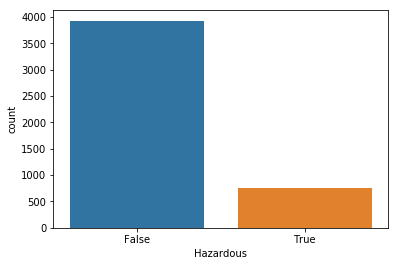

In [7]:
sns.countplot(x='Hazardous', data = nasa);

**A lot of asteroids detected are not dangerous for the planet**

Text(0.5, 1.0, 'Correlation between different features')

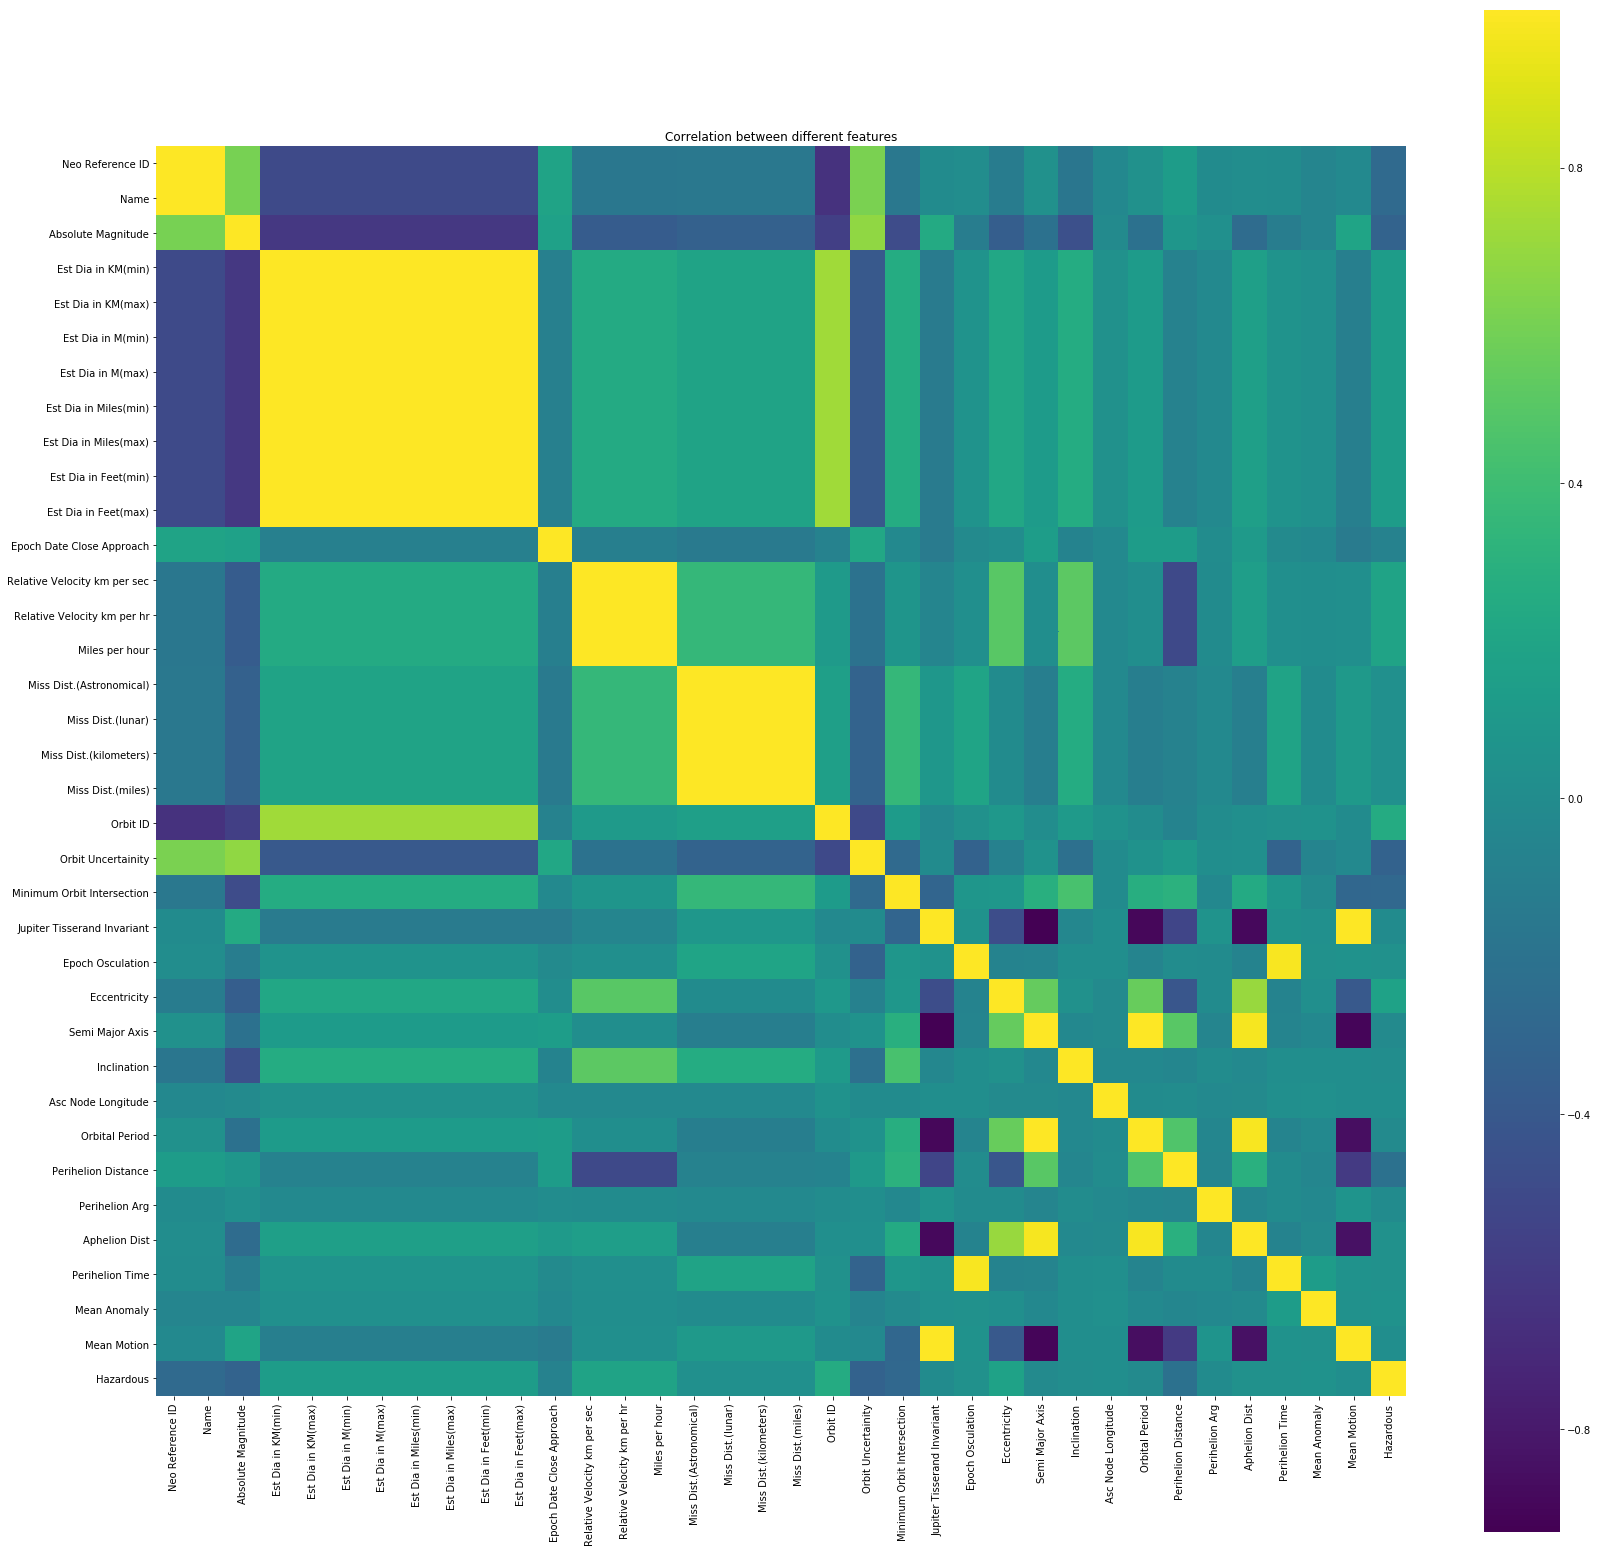

In [8]:
#check the correlation between the variables

correlation = nasa.corr()
plt.figure(figsize=(28,28))
sns.heatmap(correlation, square=True,cmap='viridis')
plt.title('Correlation between different features')

In [9]:
correlation.round(2)

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
Neo Reference ID,1.00,1.00,0.60,-0.50,-0.50,-0.50,-0.50,-0.50,-0.50,-0.50,...,-0.18,-0.03,0.04,0.13,-0.01,0.01,0.00,-0.05,-0.02,-0.27
Name,1.00,1.00,0.60,-0.50,-0.50,-0.50,-0.50,-0.50,-0.50,-0.50,...,-0.18,-0.03,0.04,0.13,-0.01,0.01,0.00,-0.05,-0.02,-0.27
Absolute Magnitude,0.60,0.60,1.00,-0.61,-0.61,-0.61,-0.61,-0.61,-0.61,-0.61,...,-0.46,-0.01,-0.21,0.09,0.03,-0.26,-0.12,-0.05,0.20,-0.33
Est Dia in KM(min),-0.50,-0.50,-0.61,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,0.26,0.04,0.12,-0.07,-0.02,0.15,0.06,0.03,-0.10,0.13
Est Dia in KM(max),-0.50,-0.50,-0.61,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,0.26,0.04,0.12,-0.07,-0.02,0.15,0.06,0.03,-0.10,0.13
Est Dia in M(min),-0.50,-0.50,-0.61,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,0.26,0.04,0.12,-0.07,-0.02,0.15,0.06,0.03,-0.10,0.13
Est Dia in M(max),-0.50,-0.50,-0.61,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,0.26,0.04,0.12,-0.07,-0.02,0.15,0.06,0.03,-0.10,0.13
Est Dia in Miles(min),-0.50,-0.50,-0.61,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,0.26,0.04,0.12,-0.07,-0.02,0.15,0.06,0.03,-0.10,0.13
Est Dia in Miles(max),-0.50,-0.50,-0.61,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,0.26,0.04,0.12,-0.07,-0.02,0.15,0.06,0.03,-0.10,0.13
Est Dia in Feet(min),-0.50,-0.50,-0.61,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,0.26,0.04,0.12,-0.07,-0.02,0.15,0.06,0.03,-0.10,0.13


In [12]:
nasa.drop(['Close Approach Date','Orbit ID','Orbit Determination Date','Equinox','Orbiting Body'],axis=1,inplace=True)
nasa.shape

(4687, 35)

### 4. Splitting labels and features   <a id='split'>

In [13]:
nasa_y = nasa['Hazardous']
nasa_X = nasa.drop('Hazardous',axis=1)

In [14]:
#Checking the shape after dropping Hazardous from nasa
nasa.shape

(4687, 35)

In [15]:
nasa_y.value_counts()

False    3932
True      755
Name: Hazardous, dtype: int64

### 5. Normalizing the input columns   <a id='normalize'>
Most of the distribution of columns follow normal distribution. Hence we can scale them using Standard Scaler to preprocess the data.

Standard Scaler standardize features by removing the mean and scaling to unit variance.<br>
Each value is reduced using the following formula
$$ z = \frac {x - \mu}{\sigma}  $$
Where x is the value,  <br>
$\mu$ is the mean of that columns,  <br>
$\sigma$ is the standard deviation of that columns

In [16]:
#importing the package
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

nasa_X = scaler.fit_transform(nasa_X)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(nasa_X, nasa_y, test_size=0.2, random_state=0)

In [17]:
nasa_X

array([[ 0.78532144,  0.78532144, -0.23104209, ...,  0.45919023,
         0.77839321, -0.43110028],
       [ 0.82337682,  0.82337682, -0.33482448, ...,  0.07081791,
        -0.06909298,  0.31258164],
       [-1.50477982, -1.50477982, -0.68076581, ...,  0.41557933,
         1.03940428, -0.52211437],
       ...,
       [ 0.88856593,  0.88856593,  0.14949337, ...,  0.60624482,
         0.20776991, -0.63207867],
       [ 0.88857687,  0.88857687, -0.16185382, ...,  0.5933032 ,
         0.2079915 , -0.56766111],
       [ 0.91274637,  0.91274637, -1.09278193, ...,  0.62542342,
         0.03397983, -0.54733945]])

### 6. Logistic Regression   <a id='lr'>

In [22]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

# instantiate model
reg = LogisticRegression()  

# Start time
start = time.time()
# fit model
reg.fit(X_train,y_train)
# End time
end = time.time()

training_time = end-start
print("Time taken to train Logistic Regression: ", training_time)

Time taken to train Logistic Regression:  0.09374618530273438


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [23]:
# make class predictions for the testing set
y_pred_class = reg.predict(X_test)

In [25]:
#Importing Confusion matrix
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test,y_pred_class)
cf

array([[780,  13],
       [ 19, 126]], dtype=int64)

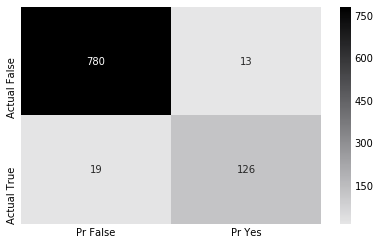

In [26]:
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(cf,cmap = cmap,xticklabels=['Pr False','Pr Yes'],yticklabels=['Actual False','Actual True'], annot=True,
            fmt='d')

In [27]:
print (metrics.classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

       False       0.98      0.98      0.98       793
        True       0.91      0.87      0.89       145

   micro avg       0.97      0.97      0.97       938
   macro avg       0.94      0.93      0.93       938
weighted avg       0.97      0.97      0.97       938



In [28]:
# calculate accuracy and other metrics
from sklearn import metrics

print(metrics.accuracy_score(y_test, y_pred_class))

0.9658848614072495


### Applying PCA to logistic regression model   <a id='pcalr'>

In [29]:
# Fitting the PCA on the data

from sklearn.decomposition import PCA
pca = PCA()
pca.fit(nasa_X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [33]:
pca.explained_variance_ratio_[:15].sum()

0.9935855469048213

**Minimum number of components for which the variance is 99% is 15**

16 components explain 99% of the variance in the dataset

Text(16, 0.99, '15')

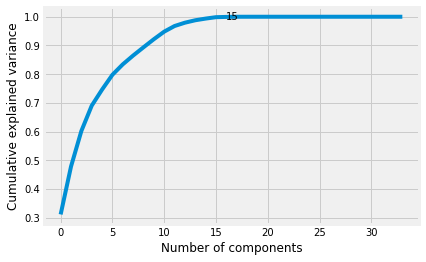

In [34]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.annotate('15',xy=(16, .99))

In [35]:
# consider first 15 components as they are explaining the 99% of variation in the data

x_pca = PCA(n_components=15)
x_pca.fit(X_train)

X_train_pca = x_pca.transform(X_train)
X_test_pca = x_pca.transform(X_test)

Text(0.5, 1.0, 'Correlation between different features')

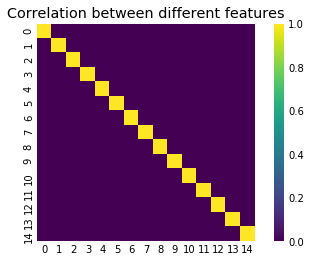

In [36]:
# correlation between the variables after transforming the data with PCA is 0

correlation = pd.DataFrame(X_train_pca).corr()
sns.heatmap(correlation, vmax=1, square=True,cmap='viridis')
plt.title('Correlation between different features')

We can see that after applying PCA, there is no correlation among any components

In [37]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

# instantiate model
pca_logreg = LogisticRegression(class_weight='balanced')

start = time.time()
# fit model
pca_logreg.fit(X_train_pca, y_train)
end = time.time()
training_time = end-start
print("Time required to train a Logistic Regression after PCA: ", training_time)

Time required to train a Logistic Regression after PCA:  0.031247377395629883


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


**Observation**

Here we observed that after PCA, the training time has reduced slightly. <br>
The original dataset had 40 features to train the model.  <br>
After PCA, we are only using 15 features which takes less time to train.

In [39]:
# make class predictions for the testing set
y_pred_class_pca = pca_logreg.predict(X_test_pca)

In [40]:
#Confusion Matrix
cf_2 = confusion_matrix(y_test,y_pred_class_pca)
cf_2

array([[729,  64],
       [ 10, 135]], dtype=int64)

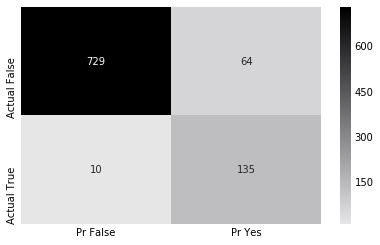

In [41]:
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(cf_2,cmap = cmap,xticklabels=['Pr False','Pr Yes'],yticklabels=['Actual False','Actual True'], annot=True,
            fmt='d')

In [42]:
print (metrics.classification_report(y_test, y_pred_class_pca))

              precision    recall  f1-score   support

       False       0.99      0.92      0.95       793
        True       0.68      0.93      0.78       145

   micro avg       0.92      0.92      0.92       938
   macro avg       0.83      0.93      0.87       938
weighted avg       0.94      0.92      0.93       938



In [44]:
print(metrics.accuracy_score(y_test, y_pred_class_pca))

0.9211087420042644


### Random Forest   <a id='rf'>

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(max_depth = 5, min_samples_split=2, n_estimators = 20, random_state = 103)

start = time.time()
rf_model=rf_clf.fit(X_train,y_train)
end = time.time()
training_time = end-start
print("Time required to train Random Forest Model: ", training_time)

rf_prediction = rf_model.predict(X_test)

Time required to train Random Forest Model:  0.19594764709472656


In [46]:
#confusion matrix
cf_3 = confusion_matrix(y_test,rf_prediction)
cf_3  

array([[793,   0],
       [  7, 138]], dtype=int64)

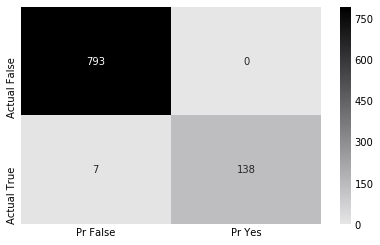

In [47]:
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(cf_3,cmap = cmap,xticklabels=['Pr False','Pr Yes'],yticklabels=['Actual False','Actual True'], annot=True,
            fmt='d')

In [48]:
print(metrics.classification_report(y_test,rf_prediction))

              precision    recall  f1-score   support

       False       0.99      1.00      1.00       793
        True       1.00      0.95      0.98       145

   micro avg       0.99      0.99      0.99       938
   macro avg       1.00      0.98      0.99       938
weighted avg       0.99      0.99      0.99       938



In [49]:
#calculate accuracy and other metrics
print(metrics.accuracy_score(y_test,rf_prediction))

0.9925373134328358


### Applying PCA to Random Forest model   <a id='pcarf'>

In [50]:
rfClassifier=RandomForestClassifier(max_depth = 5, min_samples_split=2, n_estimators = 20, random_state = 103)

start = time.time()
rfClassifier.fit(X_train_pca, y_train)
end = time.time()
training_time = end-start
print("Time required to train a Random Forest model after PCA is :", training_time)


Time required to train a Random Forest model after PCA is : 0.17195725440979004


**Observation**

Again we have observed that after PCA, the training time has reduced from 0.19 to 0.17

In [51]:
# Now test the model
# Consider first 15 components as they are explaining the 99% of variation in the data
test_pred = rfClassifier.predict(X_test_pca)


In [52]:
#Confusion Matrix
cf_4 = confusion_matrix(y_test,test_pred)
cf_4

array([[789,   4],
       [107,  38]], dtype=int64)

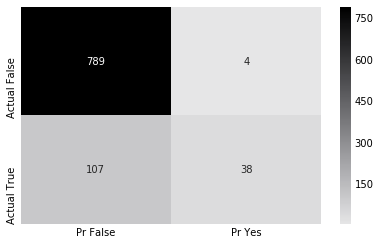

In [53]:
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(cf_4,cmap = cmap,xticklabels=['Pr False','Pr Yes'],yticklabels=['Actual False','Actual True'], annot=True,
            fmt='d')

In [54]:
#calculate accuracy and other metrics
print(metrics.classification_report(y_test,test_pred))

              precision    recall  f1-score   support

       False       0.88      0.99      0.93       793
        True       0.90      0.26      0.41       145

   micro avg       0.88      0.88      0.88       938
   macro avg       0.89      0.63      0.67       938
weighted avg       0.88      0.88      0.85       938



In [55]:
#calculate accuracy and other metrics
print(metrics.accuracy_score(y_test,test_pred))

0.8816631130063965


In [1]:
################